<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams


# Logistic Regression



<div class="span5 alert alert-info">
<p>Logistic regression is a probabilistic model that links observed binary data to a set of features.</p>

<p>Suppose that we have a set of binary (that is, taking the values 0 or 1) observations Y<sub>1</sub>....Y<sub>n</sub>, and for each observation Y<sub>i</sub> we have a vector of features X<sub>i</sub>. The logistic regression model assumes that there is some set of <b>weights</b>, <b>coefficients</b>, or <b>parameters</b> &#946;.
<br>
<p>When we <b>fit</b> a logistic regression model, we determine values for each &#946; that allows the model to best fit the <b>training data</b> we have observed. Once we do this, we can use these coefficients to make predictions about data we have not yet observed.</p>

</div>

From http://www.edwardtufte.com/tufte/ebooks, in "Visual and Statistical Thinking: 
Displays of Evidence for Making Decisions":

>On January 28, 1986, the space shuttle Challenger exploded and seven astronauts died because two rubber O-rings leaked. These rings had lost their resiliency because the shuttle was launched on a very cold day. Ambient temperatures were in the low 30s and the O-rings themselves were much colder, less than 20F.

>One day before the flight, the predicted temperature for the launch was 26F to 29F. Concerned that the rings would not seal at such a cold temperature, the engineers who designed the rocket opposed launching Challenger the next day.

But they did not make their case persuasively, and were over-ruled by NASA.

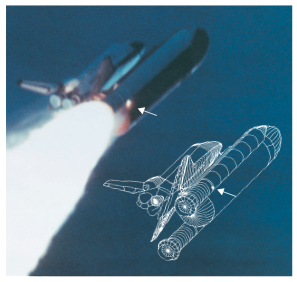

In [2]:
from IPython.display import Image as Im
from IPython.display import display
Im('./shuttle.png')

The image above shows the leak, where the O-ring failed.

We have here data on previous failures of the O-rings at various temperatures.

In [3]:
data=np.array([[float(j) for j in e.strip().split()] for e in open("chall.txt")])
data

array([[66.,  0.],
       [70.,  1.],
       [69.,  0.],
       [68.,  0.],
       [67.,  0.],
       [72.,  0.],
       [73.,  0.],
       [70.,  0.],
       [57.,  1.],
       [63.,  1.],
       [70.,  1.],
       [78.,  0.],
       [67.,  0.],
       [53.,  1.],
       [67.,  0.],
       [75.,  0.],
       [70.,  0.],
       [81.,  0.],
       [76.,  0.],
       [79.,  0.],
       [75.,  1.],
       [76.,  0.],
       [58.,  1.]])

Lets plot this data

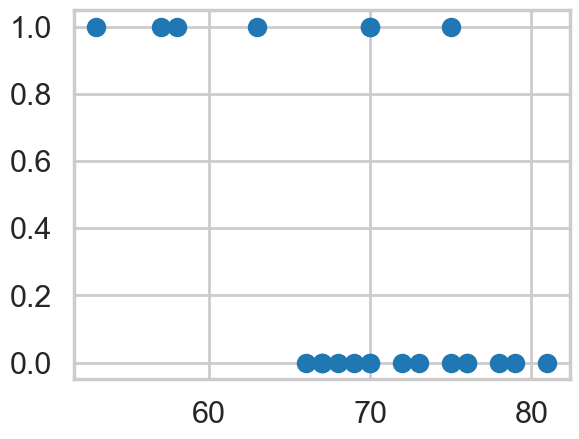

In [4]:
dat = pd.DataFrame(data, columns = ['Temp', 'Failure'])
plt.scatter(dat["Temp"],dat["Failure"])

Let's use Scikit Learn

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
model = LogisticRegression()

In [7]:
X = dat["Temp"].values
y = dat["Failure"].values
y

array([0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 1.])

In [8]:
model.fit(X.reshape(-1,1),y)

LogisticRegression()

In [9]:
model.score(X.reshape(-1,1),y)

0.8695652173913043

In [10]:
model.intercept_

array([14.86192709])

In [11]:
model.coef_

array([[-0.22950051]])

In [12]:
x = np.linspace(50, 85, 1000)
y_pred = model.predict(x.reshape(-1,1))

In [13]:
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

(-0.1, 1.1)

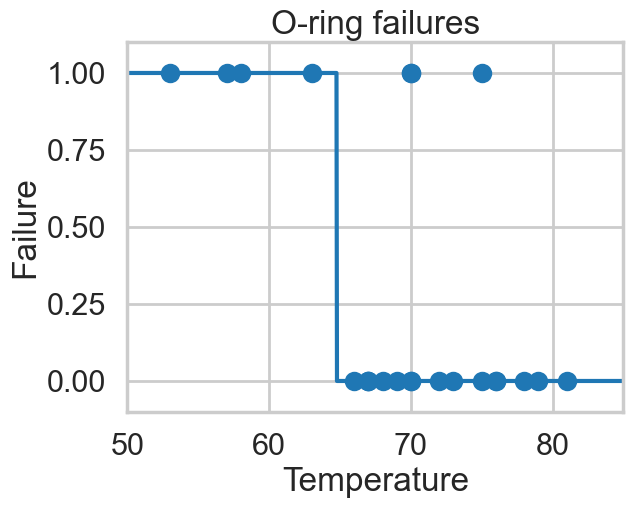

In [14]:
temps, pfail = data[:,0], data[:,1]
plt.scatter(temps, pfail)
axes=plt.gca()
plt.xlabel('Temperature')
plt.ylabel('Failure')
plt.title('O-ring failures')

# plot fitted values
plt.plot(x, y_pred)

# change limits, for a nicer plot
plt.xlim(50, 85)
plt.ylim(-0.1, 1.1)

#Square wave transition from success to failure (I'd prefer to see probabilities)

In [15]:
y_predprob = model.predict_proba(x.reshape(-1,1))
y_predprob

array([[0.03270734, 0.96729266],
       [0.03296269, 0.96703731],
       [0.03321995, 0.96678005],
       ...,
       [0.99033503, 0.00966497],
       [0.99041169, 0.00958831],
       [0.99048774, 0.00951226]])

(-0.1, 1.1)

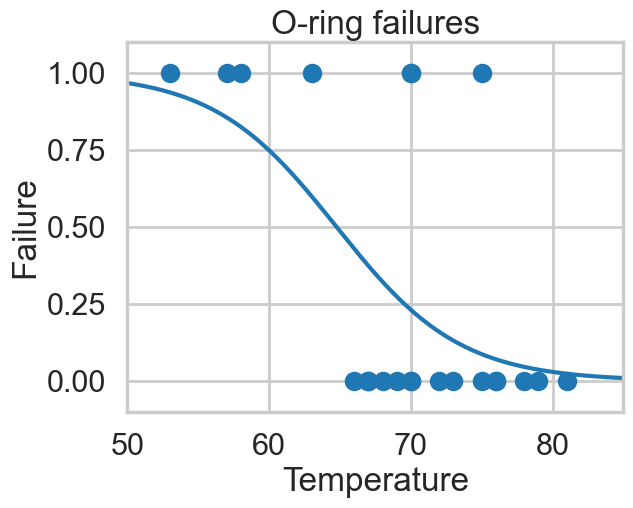

In [16]:
temps, pfail = data[:,0], data[:,1]
plt.scatter(temps, pfail)
axes=plt.gca()
plt.xlabel('Temperature')
plt.ylabel('Failure')
plt.title('O-ring failures')

# plot fitted values
plt.plot(x, y_predprob[:,1])    #y_predprob has both probability and (1-y_predprob) - so we only plot column [:,1]

# change limits, for a nicer plot
plt.xlim(50, 85)
plt.ylim(-0.1, 1.1)


# Logistic Regression: Multiple independent variables

Logistic Regression Assumptions

    Binary logistic regression requires the dependent variable to be binary.
    For a binary regression, the dependent variable should represent the desired outcome.
    Only the meaningful variables should be included.
    The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
    Logistic regression requires quite large sample sizes.

We will be using the Titanic dataset from kaggle, which is a collection of data points, including the age, gender, ticket price, etc.., of all the passengers aboard the Titanic. The data set has 891 rows and 12 columns. The goal is to see if we can predict whether any given passenger will die or survive. Hopefully you can see why logistic regression is a fitting model for this problem.

### Task 1
Read in the data as usual and view the first 5 terms, try to understand the contents of each column - think about which columns may be useful and which may not be useful.

In [17]:
df = pd.read_csv("titanic_dataset.csv")

In [18]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Cornell, Mrs. Robert Clifford (Malvina Helen L...",female,55.0,2,0,11770,25.7000,C101,S
1,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S
2,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
3,1,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,11752,26.2833,D47,S
4,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [19]:
df.describe()

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.275811
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.743772
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [20]:
df.isnull().sum()

pclass         0
survived       0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           0
cabin       1014
embarked       0
dtype: int64

### Task 2
The Columns passengerID, Name and ticket probably are not going to affect a person's chance of survival. Additionally the column cabin has a lot of null values so we won't include that.

The column Age also has Null values, for this column we will just replace them with either the mean or the median

The column survived is going to be our dependent variable, it's either 1 or 0. 

Create the X and y variables that we will be using

In [22]:
df['age'] = df['age'].fillna(df['age'].median())

In [23]:
y = df["survived"]
X = df[["pclass","age","sex","sibsp","parch","fare","embarked"]]

In [24]:
X.head()

,pclass,age,sex,sibsp,parch,fare,embarked
0,1,55.0,female,2,0,25.7000,S
1,1,49.0,female,0,0,25.9292,S
2,1,48.0,female,0,0,25.9292,S
3,1,19.0,female,0,2,26.2833,S
4,1,58.0,female,0,0,26.5500,S


The sex column is categorical so we need to do some preprocessing to convert it

As long as you have X built correctly the following will encode the data, i.e. make male/female 1 and 0 (or 0 and 1) respectively

In [25]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(X['sex'])
sex = le_sex.transform(X['sex'])
X = X.drop(['sex'], axis = 1)
X['sex'] = sex
X

,pclass,age,sibsp,parch,fare,embarked,sex
0,1,55.0,2,0,25.7000,S,0
1,1,49.0,0,0,25.9292,S,0
2,1,48.0,0,0,25.9292,S,0
3,1,19.0,0,2,26.2833,S,0
4,1,58.0,0,0,26.5500,S,0
...,...,...,...,...,...,...,...
1304,3,14.5,8,2,69.5500,S,1
1305,3,28.0,8,2,69.5500,S,1
1306,3,28.0,8,2,69.5500,S,1
1307,3,28.0,8,2,69.5500,S,1


You need to do the similar thing for the column <b>Embarked</b>

First let's remove the nan entries

In [26]:
X["embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

There are 3 options here. LabelEncoder would give a ranking to each of them 0, 1, 2 based on alphabetical order

We probably don't want this. We could use OneHotEncoder() this time to make things better, but for now, just use LabelEncoder

read <a href="https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/">This Article</a> to see more

One-Hot Encoding is the process of creating dummy variables.

In [27]:
X["embarked"].values.reshape(-1,1)

array([['S'],
       ['S'],
       ['S'],
       ...,
       ['S'],
       ['S'],
       ['S']], dtype=object)

I've included this example of OneHotEncoder but have commented it out

### Start of onehotencoder

In [28]:
"""le_embark = preprocessing.OneHotEncoder(sparse=False)
le_embark.fit(X["embarked"].values.reshape(-1,1))
embarked = le_embark.transform(X["embarked"].values.reshape(-1,1))"""

'le_embark = preprocessing.OneHotEncoder(sparse=False)\nle_embark.fit(X["embarked"].values.reshape(-1,1))\nembarked = le_embark.transform(X["embarked"].values.reshape(-1,1))'

In [29]:
#embarked.shape

3 variables, one for each S, C, Q

Get rid of the original Embarked

In [30]:
"""X = X.drop(["embarked"], axis = 1)"""

'X = X.drop(["embarked"], axis = 1)'

Now put in the new columns

There's probably a better way but this will work

In [31]:
"""X["embarkC"] = embarked[:,0]
X["embarkQ"] = embarked[:,1]
X["embarkS"] = embarked[:,2]"""

'X["embarkC"] = embarked[:,0]\nX["embarkQ"] = embarked[:,1]\nX["embarkS"] = embarked[:,2]'

In [32]:
#X

### End of OneHotEncoder

It's not advised to do a LabelEncoder for this type of data, but it might do ok, and we'll use it now for simplicity

In [33]:
le_embark = preprocessing.LabelEncoder()
le_embark.fit(X["embarked"])
embarked = le_embark.transform(X["embarked"])
X = X.drop(["embarked"], axis = 1)
X["embarked"] = embarked
X

,pclass,age,sibsp,parch,fare,sex,embarked
0,1,55.0,2,0,25.7000,0,2
1,1,49.0,0,0,25.9292,0,2
2,1,48.0,0,0,25.9292,0,2
3,1,19.0,0,2,26.2833,0,2
4,1,58.0,0,0,26.5500,0,2
...,...,...,...,...,...,...,...
1304,3,14.5,8,2,69.5500,1,2
1305,3,28.0,8,2,69.5500,1,2
1306,3,28.0,8,2,69.5500,1,2
1307,3,28.0,8,2,69.5500,1,2


### Task 3
Do a train_test_split and build the model using sklearn

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [35]:
titanic_lm = LogisticRegression

In [36]:
titanic_lm = LogisticRegression(max_iter=1000)

In [37]:
titanic_lm.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [38]:
y_train_predicted = titanic_lm.predict(X_train)
y_train_predprob = titanic_lm.predict_proba(X_train)

In [39]:
titanic_lm.score(X_train,y_train)

0.7981651376146789

We get a score of 80% accurate in predicting whether someone survives or not

However, this is on the training set, we really should use a different set to score our model, one that it has not seen before

Make sure you keep your titanic_lm model, do not overwrite it in the next task

### Task 4 
Let's use the model to make predictions with new information

In [40]:
y_test_predicted = titanic_lm.predict(X_test)
y_test_predprob = titanic_lm.predict_proba(X_test)

In [41]:
titanic_lm.score(X_test, y_test)

0.7957317073170732

### Task 5: Join new predictions and probabilities into original dataset

In [42]:
y_predicted = titanic_lm.predict(X)
y_predprob = titanic_lm.predict_proba(X)

In [43]:
df['survive_predicted'] = y_predicted
df['survive_probability'] = y_predprob[:,1]

In [44]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survive_predicted,survive_probability
0,1,1,"Cornell, Mrs. Robert Clifford (Malvina Helen L...",female,55.0,2,0,11770,25.7000,C101,S,1,0.707359
1,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,1,0.837154
2,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S,1,0.841472
3,1,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,11752,26.2833,D47,S,1,0.920741
4,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,1,0.794074
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.5500,NaN,S,0,0.015649
1305,3,0,"Sage, Mr. Douglas Bullen",male,28.0,8,2,CA. 2343,69.5500,NaN,S,0,0.010213
1306,3,0,"Sage, Mr. Frederick",male,28.0,8,2,CA. 2343,69.5500,NaN,S,0,0.010213
1307,3,0,"Sage, Mr. George John Jr",male,28.0,8,2,CA. 2343,69.5500,NaN,S,0,0.010213


We can see what our model predicts for the new data, additionally we've added in the probabilities for more information